# Sui_Wenyu_HW6_report

In [1]:
# import packages
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg
import functions

## 1.Conceptual questions

### 1.a

We control the data-fit complexity in the regression tree by taking the following steps:

1.  Grow a large tree.
2. Stop when a minimum node size has reached.
3. Perform pruning by minimizing the following cost function
$$C_{\alpha}(S) = \sum_{j=1}^{|J|}\sum_{x_i \in R_i} (y_i - \hat{c_j})^2 + \alpha|J|$$ 

where $|J|$ represents the number of terminal nodes in the tree J. <br>
The hyperparameter $\alpha$ in the equation above can be tuned and selected by cross validation.

### 1.b

Here are the steps to construct OOB errors for a random forest classifier:
1. For each observation $z^i (x^i, y^i)$, construct its random forest predictor by averaging only those trees corresponding to bootstrap samples in which $z^i$ did not appear.
<br><br>
2. Use $x^i$ and the random forest predictor constructed in step 1 to predict the class ($y^i$) of observation $z^i$.
<br><br>
3. Repeat step 1 and step 2 for all the samples in the dataset. The OOB error is measured by the number of misclassified samples divided by the total number of samples.

To determine the best number of trees, we could gradually increase the number of trees and stop training the model when the OOB error gets low and stabilized.

In the step 1 and 2 above, the training data of each random forest predictor is different from its test data. Therefore, OOB error is a test error.

### 1.c

**Boosting:**

1. Boostings requires knowledge on the performance of weak learners and runs weak learners on weighted example set. The errors from the previous weak learner are weighted more heavily than other data points in the training dataset for the current weak learner.
<br><br>
2. Boosting combine weak hypotheses linearly

**Bagging:**

1. Bagging runs weak learners on bootstrap replicates of the training set.
<br><br>
2. Bagging takes average of weak leaners to reduce variances.

The random forest belongs to Bagging.

### 1.d

Here are some ways to prevent overfit in CART:

1.  Control the maximum depth of the tree.
<br><br>
2. Prune the tree.
<br><br>
3. Take bootstrap samples from training dataset. Train multiple trees and use the average result. (Implement random forest.)
<br><br>
4. Use cross validations to measure the performance of the CART models. Select the model with the best performance in cross validation.

## 2. AdaBoost


### 2.a

The following code chunk displays the three decision stumps that we choose when $t = 1,2,3$ <br>
The prediction errors of each decision stumps are circled with gray squares.<br>
The table under the figures of the decision stumps diplays the calculated values of $\epsilon_t, \alpha_t, Z_t$ and $D_t$. It also displays the predictions made by each decision stump regarding to each data point $h_t(X_i)$<br>
The final predictions made by the AdaBoost model is shown at the bottom of the table.

The detailed calculation process of the values in the table can be found in the Excel file "**Q2 AdaBoost.xlsx**" in the submitted zipped file of this homework. Here are some key steps:

1. Set $t=1$, define weights of data points $D_1(i)=\frac{1}{8}=0.125$
2. Set the first decision stump classifier as shown in the first figure below.
3. Since this classifier incorrectly classified $X_5$ and $X_6$, we can calculate:
<br><br>
$$\epsilon_1 = \sum_i^8 D_1(i) \mathbb{I}(y^i \neq h_1(X_i))= D_1(5) + D_1(6) = 0.25$$
<br><br>
$$\alpha_1 = \frac{1}{2}ln(\frac{1-\epsilon_1}{\epsilon_1}) = 0.5493$$
4. Then we calculate $Z_1$ using the formula below
$$Z_1 = \sum_{i=1}^8 D_1(i)e^{-\alpha_1y^ih_1(X_i)} = 0.8660$$ 
where $y^i$ is the the true label of data point $X_i$ and $h_1(X_i)$ is the prediction made by our first decision stump regarding $X_i$
<br><br>
5. Next, we update the wieghts of the data points $D_2(i)=\frac{D_1(i)}{Z_1}e^{-\alpha_1y^ih_1(X_i)}$ , for $i=1...8$. The updated $D_2(i)$ values are displayed in the second row of the table below.
<br><br><br>

6. Set up $t=2$ and the second decision stump
7. Using the same method above, we can get
$$\epsilon_2 = \sum_i^8 D_2(i) \mathbb{I}(y^i \neq h_2(X_i))= D_2(2) + D_2(7) + D_2(8) = 0.1667$$
$$\alpha_2 = \frac{1}{2}ln(\frac{1-\epsilon_2}{\epsilon_2}) = 0.8047$$
$$Z_2 = \sum_{i=1}^8 D_2(i)e^{-\alpha_2y^ih_2(X_i)} = 0.7454$$ 
<br><br>
8. Again, we can update the weights using this formula: $D_3(i)=\frac{D_2(i)}{Z_2}e^{-\alpha_2y^ih_2(X_i)}$ , for $i=1...8$.<br>The updated $D_3(i)$ values are displayed in the third row of the table below.

9. Set up $t=3$ and the third decision stump
10. Repeating the same steps, we can get
$$\epsilon_3 = \sum_i^8 D_3(i) \mathbb{I}(y^i \neq h_3(X_i))= D_3(7) + D_3(8) = 0.1000$$
$$\alpha_3 = \frac{1}{2}ln(\frac{1-\epsilon_3}{\epsilon_3}) = 1.0986$$
$$Z_3 = \sum_{i=1}^8 D_3(i)e^{-\alpha_3y^ih_3(X_i)} = 0.6000$$ 
<br><br>

11. Then we calculate the following value for each data point:
$$H(X_i) = \sum_{t=1}^3 \alpha_t h_t(X_i)$$ 
where $i=1...8$. <br>
The $H(X^i)$ values are displayed at the bottom of the table below.
<br><br>
12. We will use the sigh of $H(X_i)$ as the final prediction made by the Adaboost model for data point $X_i$. If $H(X_i) >= 0$, our model predicts $X_i$ to be 1. Otherwise, it predict $X_i$ to be -1.  

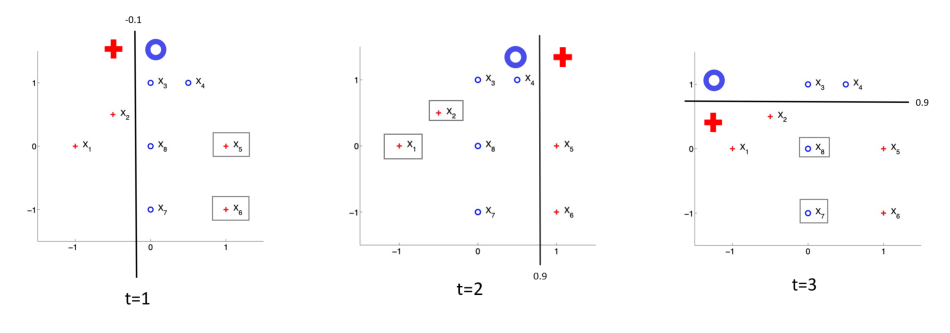

In [2]:
plt.figure(figsize = (12,12))
plt.subplot(1,3,1)
img = mpimg.imread('Q2 AdaBoost, t=1.png')
imgplot = plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,2)
img = mpimg.imread('Q2 AdaBoost, t=2.png')
imgplot = plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,3)
img = mpimg.imread('Q2 AdaBoost, t=3.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

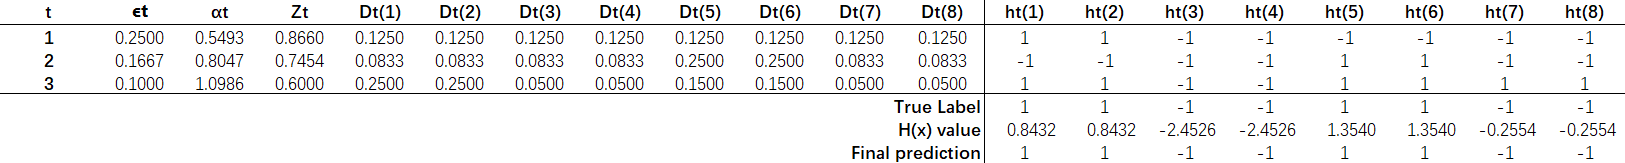

### 2.b

Comparing the final prediction and the true label of each data point in the table above, we can see that the final predictions of all the data points match their true labels. Therefore, the training error equals to zero. 

The AdaBoost model outperfoms a single decision stump becuase each decision stump in the AdaBoost model learns from the errors of the previous decision stump. The data points incorrectly predicted by the previous decision stump will be wighted more in the current decision stump. By linearly combining all the decision stumps, AdaBoost can construct a much stronger classifier.

## 3. Random forest and one-class SVM for email spam classifier

In [3]:
# Read data
spam_data_df = functions.read_spam_data()
spam_data = np.array(spam_data_df)

X = spam_data[:, 0:-1]
y = spam_data[:, -1]

In [4]:
#spam_data_df.to_csv('data\spambase\spambase.csv')

### 3.a

The classification tree is fitted and visualized as below. The image is also saved as "**Q3.1 Visualization of the Classification Tree.jpg**" in the submitted zipped file for this homework.

In [5]:
tree = DecisionTreeClassifier().fit(X,y)

plt.figure(figsize=(140,70))
plot_tree(tree)
plt.title("Visualization of the Classification Tree", fontsize = 120)
plt.savefig('Q3.a Visualization of the Classification Tree.jpg')
plt.show()

### 3.b

Here are the steps taken in the following code chunks:

1. The first code chunk shuffles and splits the data into training and test. 80% of the data are used for training and the rest 20% are used for testing.
<br><br>
2. The second code chunk fits the classification tree model using the training data. It also makes predictions on the test data and reports the test error rate. It shows that the error rate for the classification tree is around 10%. (This error rate may change everytime when the code runs due to randomness.)
<br><br>
3. The third code chunk fits a Radom Forest model with 50 trees and displays the test error rate of this model. <br>
(The error rate is around 6%. It may change everytime when the code runs due to randomness.) <br>
It then fits multiple random forest models, with the number of trees ranging from 1 to 100. 
<br><br>
4. The last code chunk plots the curve of test error (total misclassification error rate) versus the number of trees (1 to 100) for the random forests, and also plots the test error for the CART model .

In [6]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 22)

In [7]:
# fit decision tree
tree = DecisionTreeClassifier().fit(X_train,y_train)

error_tree = functions.calculate_test_error(tree, X_test, y_test)
print("Test error of Classification Tree: ", round(error_tree, 4))

Test error of Classification Tree:  0.0955


In [8]:
# fit random forest with 50 trees
random_forest = RandomForestClassifier(n_estimators = 50).fit(X_train,y_train)

error_random_forest = functions.calculate_test_error(random_forest, X_test, y_test)
print("Test error of Random Forest (50 Trees) : ", round(error_random_forest, 4))


# fit random forest models, try all number of trees from 1 to 100
error_list_random_forest = []

for n in range(1, 101):
    random_forest = RandomForestClassifier(n_estimators = n).fit(X_train,y_train)
    error_random_forest = functions.calculate_test_error(random_forest, X_test, y_test)
    error_list_random_forest += [error_random_forest]

Test error of Random Forest (50 Trees) :  0.0554


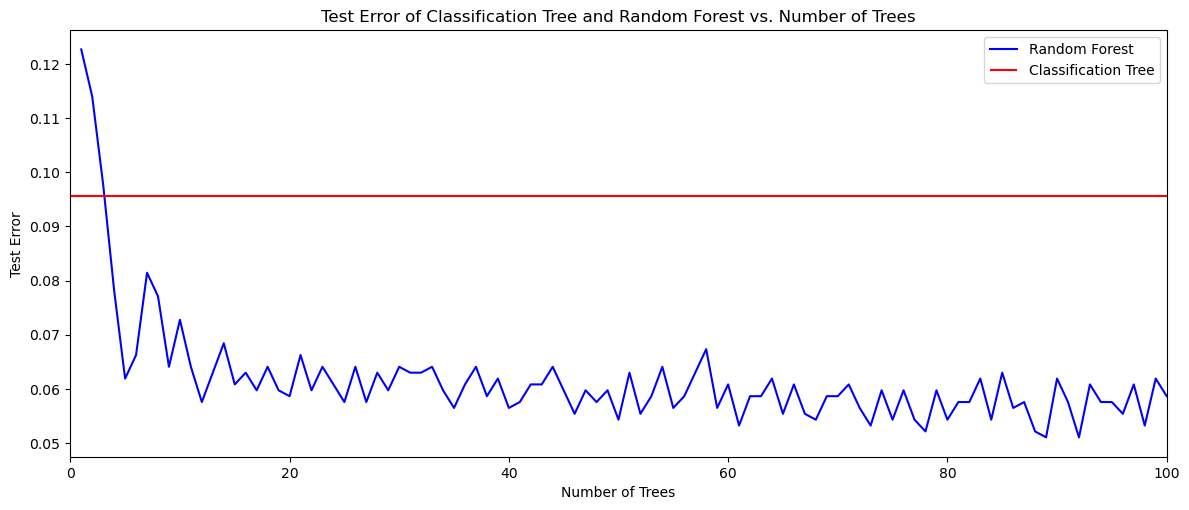

In [9]:
#Visualize the results
plt.figure(figsize = (12,5))
plt.plot(range(1,101), error_list_random_forest, label = "Random Forest", color = "blue")
plt.hlines(error_tree, label = "Classification Tree", xmin = 0, xmax = 100, color = "red")
plt.xlim((0, 100)) 
plt.legend()
plt.xlabel("Number of Trees")
plt.ylabel("Test Error")
plt.tight_layout()
plt.title("Test Error of Classification Tree and Random Forest vs. Number of Trees")
plt.show()

### 3.c 

From the plot in the last question, it can be observed that the test error of random forest reaches the lowest level and gets stabilized when the number of trees gets larger than 20. Therefore in this question, we will chose the number of trees to be 30 to fit our models. 

The first code chunk fits the random forest models, with parameter $v$ ranging from 1 to 57. (We have 57 predictor variables in total.)<br>
The second code chunk shows the results by plotting both the OOB error as well as the test error against parameter $ν$.

It can be observed that both the OOB error and the test error gradually increase as the parameter $v$ increases. There are some fluctuations in the middle, but the overall trends of these two types of errors stay the same.<br>
Also, in most of the situations, the test error is higher and increase faster than OOB error.

In [10]:
oob_error_list_random_forest = []
test_error_list_random_forest = []

for v in range(1, 58):
    random_forest = RandomForestClassifier(n_estimators = 30,   oob_score = True,
                                   max_features = int(v)).fit(X_train,y_train)
    oob_error = 1 - random_forest.oob_score_
    oob_error_list_random_forest += [oob_error]
    
    test_error = functions.calculate_test_error(random_forest, X_test, y_test)
    test_error_list_random_forest += [test_error]

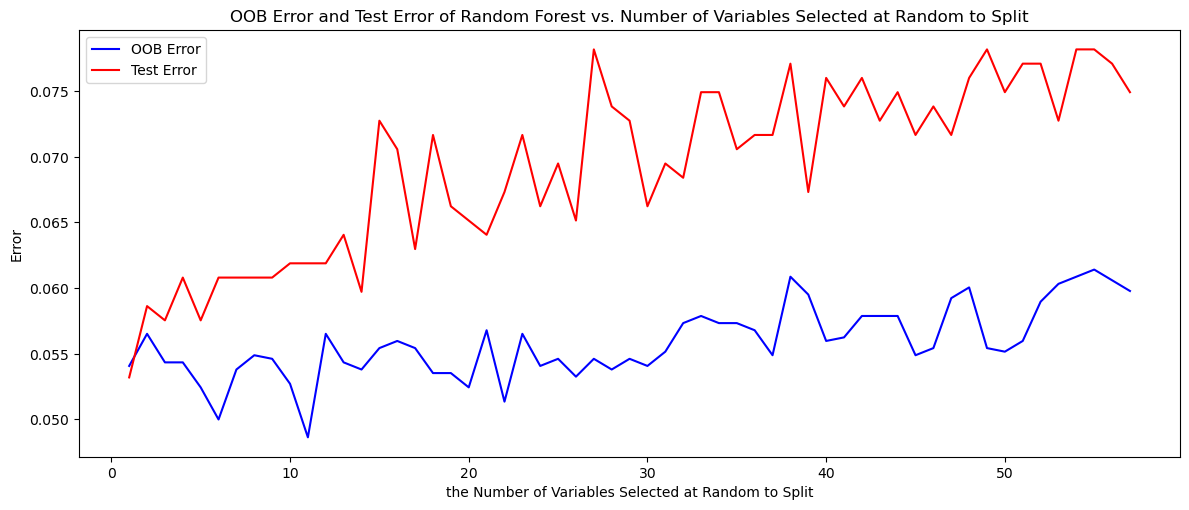

In [11]:
#Visualize the results
plt.figure(figsize = (12,5))
plt.plot(range(1,58), oob_error_list_random_forest, label = "OOB Error", color = "blue")
plt.plot(range(1,58), test_error_list_random_forest, label = "Test Error", color = "Red")

plt.legend()
plt.xlabel("the Number of Variables Selected at Random to Split")
plt.ylabel("Error")
plt.tight_layout()
plt.title("OOB Error and Test Error of Random Forest vs. Number of Variables Selected at Random to Split")
plt.show()

### 3.d

Here are the steps taken in the following code chunks:
1. The first code chunk  extracts all the non-spam emails from the training data.
<br><br>
2. The second code chunk fits the One-Class SVM model with the data selected from the first step and shows the training error of the model. Since we know that the data used to fit this model only contains non-spam emails, we would like the training error of the One-Class SVM model to be minimized. After tuning the hyperparameters by trial and error, we decide to set $nu = 0.01$ so that the model achieves the lowest traning error.
<br><br>
3. The third code chunk uses the One-Class SVM model fitted in the second step to make predictions on the test dataset. It shows that the test error rate (total missclassification error rate) of the One-Class SVM model is around 35%. (This error rate may change every time when the code runs due to randomness.)

In [12]:
# filter non-spam data from training dataset
idx_nspam = np.argwhere(y_train == 0).flatten()
X_train_nspam = X_train[idx_nspam, :]
y_train_nspam = y_train[idx_nspam]

In [13]:
# fit one class svm
one_class_svm = OneClassSVM(kernel="rbf", nu = 0.01).fit(X_train_nspam)

# show training error
y_pred = one_class_svm.predict(X_train_nspam)

y_pred[np.argwhere(y_pred == 1).flatten()] = 0
y_pred[np.argwhere(y_pred == -1).flatten()] = 1

error = 1- accuracy_score(y_train_nspam, y_pred)
print("Training Error: ", round(error,4))

Training Error:  0.0099


In [14]:
# use one-class SVM to make predictions on test data
# show test error
y_pred = one_class_svm.predict(X_test)

y_pred[np.argwhere(y_pred == 1).flatten()] = 0
y_pred[np.argwhere(y_pred == -1).flatten()] = 1

error = 1- accuracy_score(y_test, y_pred)
print("Misclassification error rate (Test Error) of One-Class SVM: ", round(error,4))

Misclassification error rate (Test Error) of One-Class SVM:  0.3692


## 4.Locally weighted linear regression and bias-variance tradeoff

### 4.a

Since we know $y_i = \beta^{*T}x_i + \epsilon_i$ where $\epsilon_i$ ~ $N(0, \sigma^2)$ are i.i.d. <br>
Therefore, we have $y_i \sim N(\beta^{*T}x_i, \sigma^2)$

The pdf of $y_i$ conditional on $\beta$ can be written as:<br>
$f(y_i|\beta) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2} (\frac{y_i - \beta^T x_i}{\sigma})^2}$

Therefore, we get:<br>
$$\begin{equation}
\begin{aligned}
log(f(y_i|\beta)) & = log(\frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2} (\frac{y_i - \beta^T x_i}{\sigma})^2}) \\
& = log(\frac{1}{\sqrt{2\pi\sigma^2}}) + log(e^{-\frac{1}{2}(\frac{y_i-\beta^T x_i}{\sigma})^2})  \\
& = - \frac{1}{2}log(2\pi \sigma^2) - \frac{(y_i - \beta^T x_i)^2}{2\sigma^2}
\end{aligned}
\end{equation}$$

The log likelihood finction can be written as:<br>
$$\begin{equation}
\begin{aligned}
L(\beta) & = \sum_{i=1}^n log(f(y_i|\beta)) \\
& = -\frac{n}{2}log(2\pi\sigma^2) - \sum_{i=1}^n \frac{(y_i - \beta^Tx^i)^2}{2\sigma^2}
\end{aligned}
\end{equation}$$

Therefore, the MLE of $\beta$ can be written as:
$$\hat{\beta} = argmax_{\beta} \{-\frac{n}{2}log(2\pi\sigma^2) - \sum_{i=1}^n \frac{(y_i - \beta^Tx^i)^2}{2\sigma^2} \}$$

Since the term $-\frac{n}{2}log(2\pi\sigma^2)$ and $2\sigma^2$ are constant, the equation above is equivalent to:<br>
$$\hat{\beta} = argmin_{\beta}\{ \sum_{i=1}^n (y_i - \beta^Tx^i)^2 \}$$

Rewritting the equation above in matrices, we get:
$$\hat{\beta} = argmin_{\beta}\{ ||X\beta - y||_2^2\}$$

Introducing the squared $l_2$ norm penalty term for the ridge regression into the equation above, we get:<br>
$$\hat{\beta}(\lambda) = argmin_{\beta}\{ ||X\beta - y||_2^2 + \lambda||\beta||_2^2\}$$

### 4.b

From the last question, we can get
$$\hat{\beta}(\lambda)=argmin_{\beta}l(\beta) = argmin_{\beta}\{||X\beta - y||_2^2 + \lambda||\beta||_2^2\}$$ <br><br>

We can also get:
$$
\frac{\partial l(\beta)}{\partial \beta} = 2X^TX\beta - 2X^Ty + 2\lambda\beta
$$

Since we try to derive $\beta$ that minimizes $l(\beta)$, we can set $\frac{\partial l(\beta)}{\partial \beta} = 0$ and get the following solution: <br><br>
$$\beta = (X^TX + \lambda I)^{-1}X^Ty$$

Therefore, we know $$\hat{\beta}(\lambda) = (X^TX + \lambda I)^{-1}X^Ty$$
and this is the closed form solution of $\hat{\beta}(\lambda)$.

Next, we will try to find the distribution of $\hat{\beta}(\lambda)$ conditioning on $X$.<br>
Here's the expectation of $\hat{\beta}$:

$$\begin{equation}
\begin{aligned}
E[\hat{\beta}(\lambda)] & = (X^TX + \lambda I)^{-1} X^T E(y) 
\end{aligned}
\end{equation}
$$

Here's the variance of $\hat{\beta}$:
$$\begin{equation}
\begin{aligned}
Var(\hat{\beta}(\lambda)) & = Var((X^TX + \lambda I)^{-1}X^Ty) \\
& = (X^TX + \lambda I)^{-1}X^T \cdot Var(y) \cdot((X^TX + \lambda I)^{-1}X^T)^T
\end{aligned}
\end{equation}
$$

Here, we can define $M = (X^TX + \lambda I)^{-1} X^T$. <br>
Since we know that $y \sim N(X\beta^{*}, \sigma^2I)$, we can derive
$$\hat{\beta}(\lambda) \sim (M X\beta^{*}, \sigma^2MM^T)$$

### 4.c

Give a fixed test point $x$, the bias can be written as 
$$\begin{equation}
\begin{aligned}
E[\hat{\beta}(\lambda)^Tx] - \beta^{*T}x &= E[x^T\hat{\beta}(\lambda)] - x^T\beta^* \\
& = x^TE[\hat{\beta}(\lambda)] - x^T\beta^* \\
& = x^T(X^TX + \lambda I)^{-1}X^TX\beta^* - x^T\beta^* \\
& = x^T(X^TX + \lambda I)^{-1}(X^TX\beta^* - (X^TX + \lambda I)\beta^*) \\
& = x^T(X^TX + \lambda I)^{-1}(- \lambda \beta^{*}) \\
& = -\lambda x^T(X^TX + \lambda I)^{-1} \beta^*
\end{aligned}
\end{equation}
$$

### 4.d

The variance term can be written as:
$$\begin{equation}
\begin{aligned}
Var(x^T \hat{\beta}(\lambda))  & = E[(x^T\hat{\beta}(\lambda) - E[x^T\hat{\beta}(\lambda)])^2] \\
& =E[(x^T\hat{\beta}(\lambda))^2] - (E[x^T\hat{\beta}(\lambda)])^2
\end{aligned}
\end{equation}
$$

From the equations derived in previous questions, we know that

$$\begin{equation}
\begin{aligned}
E[(x^T\hat{\beta}(\lambda))^2] & = E[x^T \hat{\beta}(\lambda) \hat{\beta}(\lambda)^T x] \\
& = x^T E[\hat{\beta}(\lambda) \hat{\beta}(\lambda)^T] x \\
& = x^T (Var(\hat{\beta}(\lambda))+E[\hat{\beta}(\lambda)] E[\hat{\beta}(\lambda)]^T)x \\
& = x^T(\sigma^2MM^T + MX\beta^*\beta^{*T}X^TM^T)x \\
& = \sigma^2x^TMM^Tx + x^TMX\beta^*\beta^{*T}X^TM^Tx
\end{aligned}
\end{equation}
$$

Also,

$$\begin{equation}
\begin{aligned}
(E[x^T\hat{\beta}(\lambda)])^2 & = (x^TMX\beta^*)^2 \\
&  = x^TMX\beta^*\beta^{*T}X^TM^Tx
\end{aligned}
\end{equation}
$$

Therefore,

$$\begin{equation}
\begin{aligned}
Var(x^T\hat{\beta}(\lambda)) & = \sigma^2x^TMM^Tx
\end{aligned}
\end{equation}
$$

### 4.e

The first code chunk below defines $X$, $x$, $\beta^*$ and $\sigma^2$ as required in the question. <br>
The sercond code chunk plots the MSE as a function of the regularization parameter $\lambda$.

In [15]:
# define the matrices and vectors
X_train_Q4 = np.array([[1, 0.15], [1, 1.1]])
X_test_Q4 = np.array([1, 1]).reshape((2,1))
beta_star = np.array([-1, 1]).reshape((2,1))
sigma_sq = 0.5

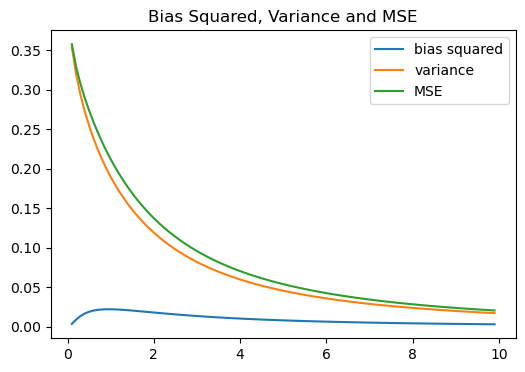

In [16]:
functions.calculate_MSE(X_train = X_train_Q4, 
                                             X_test = X_test_Q4, 
                                             beta_star = beta_star,  
                                             sigma_sq = sigma_sq)

### 4.f

The first code chunk below defines the new $x$ as required in the question. <br>
The sercond code chunk plots the MSE as a function of the regularization parameter $\lambda$.

The MSE  curve in the previous question has different pattern compared to the MSE curve in this question.<br>
The MSE curve in the previous question converges to a value around 0.03 as $\lambda$ increases when $\lambda \in (0,10)$. The MSE curve in this question converges to a value around 0.3 in the same range of $\lambda$. It can be seen that the pattern and value of MSE as a function of $\lambda$ depend on the value of $x$ test data.

Also, in both plots, it is hard to determin a $\lambda$ value that minimizes MSE. We may not always have this situation if we try different $x$ as test data.

In [17]:
# define the matrices and vectors
X_test_Q4 = np.array([1, 1.5]).reshape((2,1))

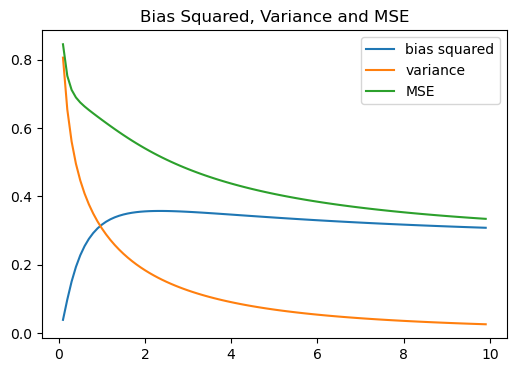

In [18]:
functions.calculate_MSE(X_train = X_train_Q4, 
                                             X_test = X_test_Q4, 
                                             beta_star = beta_star,  
                                             sigma_sq = sigma_sq)